In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('student_data.csv',encoding='unicode_escape')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [6]:
df = df.dropna(subset=['EthnicGroup','ParentEduc','TestPrep','ParentMaritalStatus','PracticeSport','IsFirstChild','NrSiblings','TransportMeans','WklyStudyHours'])
df.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [10]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,19243.000000,19243.000000,19243.000000,19243.000000
mean,2.147482,66.635504,69.534324,68.602869
std,1.443735,15.362362,14.785547,15.481824
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,80.000000
max,7.000000,100.000000,100.000000,100.000000


In [11]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39


In [12]:
# to replace a string value in a column --- df['column'] = df['column'].str.replace('x','y')

Gender Disrtibution

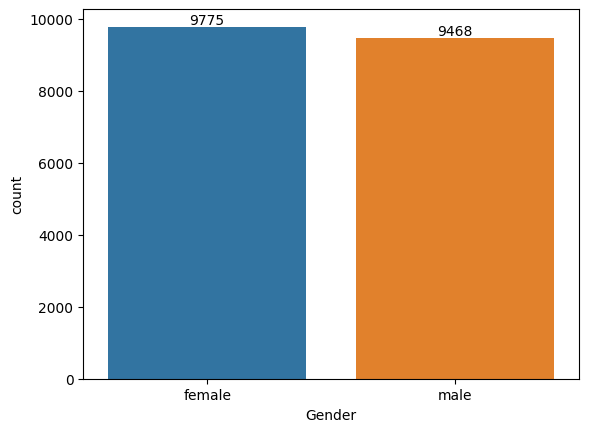

In [20]:
ax = sns.countplot(x='Gender',data=df,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

No of females student is slightly more than tha no of males students

In [30]:
gb = df.groupby('ParentEduc').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb.head()

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.541478,71.317685,70.551080
bachelor's degree,70.724379,73.560401,73.873964
high school,64.294461,67.284124,65.495892
master's degree,72.293680,75.922677,76.423792
some college,66.578305,69.300113,68.651525


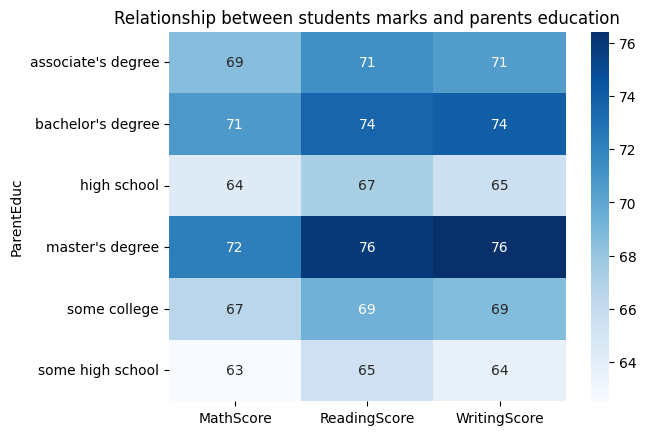

In [35]:
sns.heatmap(gb,annot=True, cmap='Blues')
plt.title('Relationship between students marks and parents education')
plt.show()

From above chart we have concluded that the education of the parents have good impact on students score like students whose parents have masters degree have highest score

In [32]:
gb1 = df.groupby('ParentMaritalStatus').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb1.head()

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.730344,69.816339,68.954545
married,66.705241,69.474248,68.488509
single,66.285590,69.388021,68.543403
widowed,68.083784,70.662162,69.651351


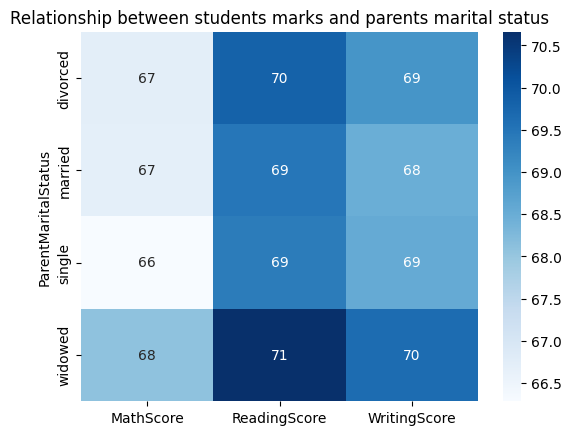

In [36]:
sns.heatmap(gb1,annot=True, cmap='Blues')
plt.title('Relationship between students marks and parents marital status')
plt.show()

Marital status of parents barely have any effect on studies of students

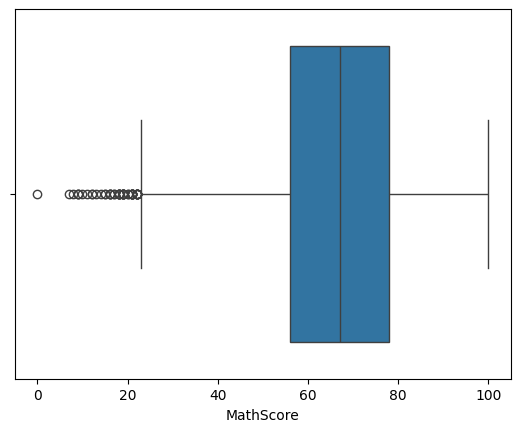

In [39]:
sns.boxplot(data=df,x='MathScore')
plt.show()

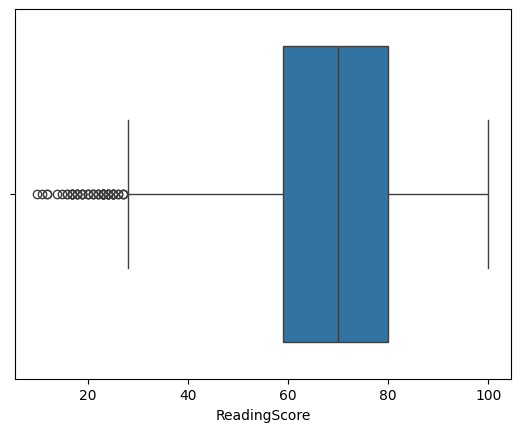

In [40]:
sns.boxplot(data=df,x='ReadingScore')
plt.show()

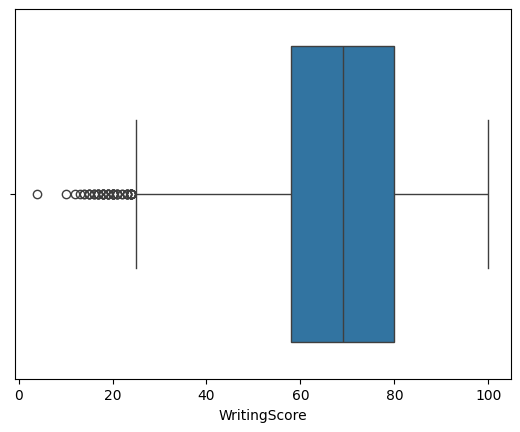

In [41]:
sns.boxplot(data=df,x='WritingScore')
plt.show()

It shows that 50% of the students have marks in range from 55 to 80 and also some outliers at minimum 

Distribution of Ethnic group

In [46]:
groupA = df.loc[(df['EthnicGroup']=='group A')].count()['EthnicGroup']
groupB = df.loc[(df['EthnicGroup']=='group B')].count()['EthnicGroup']
groupC = df.loc[(df['EthnicGroup']=='group C')].count()['EthnicGroup']
groupD = df.loc[(df['EthnicGroup']=='group D')].count()['EthnicGroup']
groupE = df.loc[(df['EthnicGroup']=='group E')].count()['EthnicGroup']


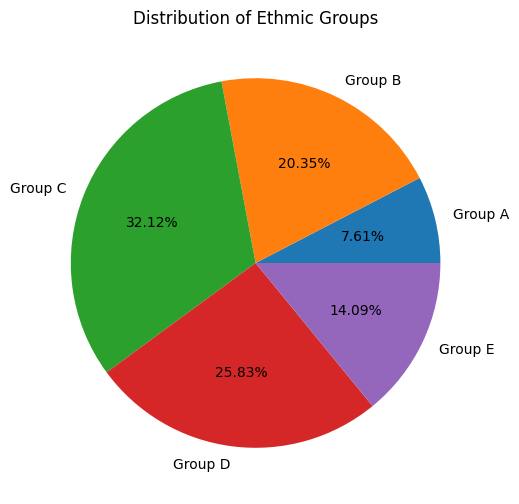

In [63]:
myList = [groupA,groupB,groupC,groupD,groupE]
plt.figure(figsize=(10, 6))
plt.pie(myList,labels=['Group A','Group B','Group C','Group D','Group E'],autopct='%1.2f%%')
plt.title("Distribution of Ethmic Groups")
plt.show()

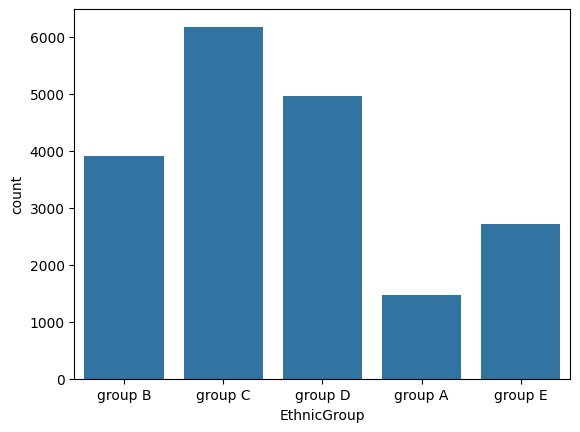

In [65]:
sns.countplot(x='EthnicGroup',data=df)
plt.show()

So group C has most contribution in ethnic group

Scores based on study hours

In [69]:
gb3 = df.groupby('WklyStudyHours').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb3.head()

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,66.957425,69.775598,68.793123
< 5,64.605650,68.431518,67.359227
> 10,68.878382,70.545644,69.998811


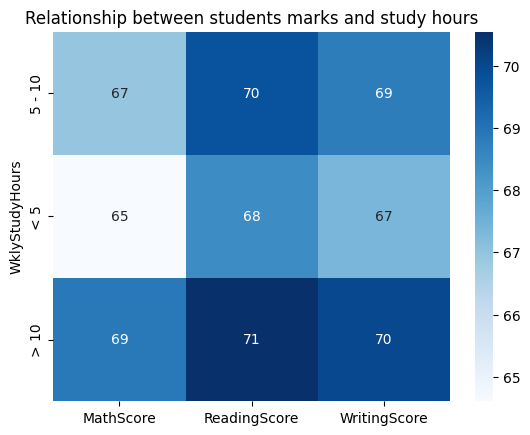

In [70]:
sns.heatmap(gb3,annot=True, cmap='Blues')
plt.title('Relationship between students marks and study hours')
plt.show()

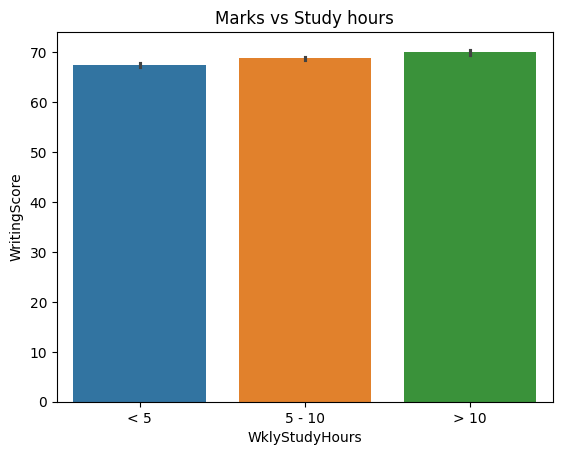

In [79]:
sns.barplot(y='WritingScore',x='WklyStudyHours',data=df,hue='WklyStudyHours')
plt.title("Marks vs Study hours")
plt.show()

From above graphs we came to the conclusion that there si not much difference in students marks based on difference of study hours as student who study more than 10 hours got a little higher marks than student who study around 5 hours